**Retrieval-Augmented Generation**

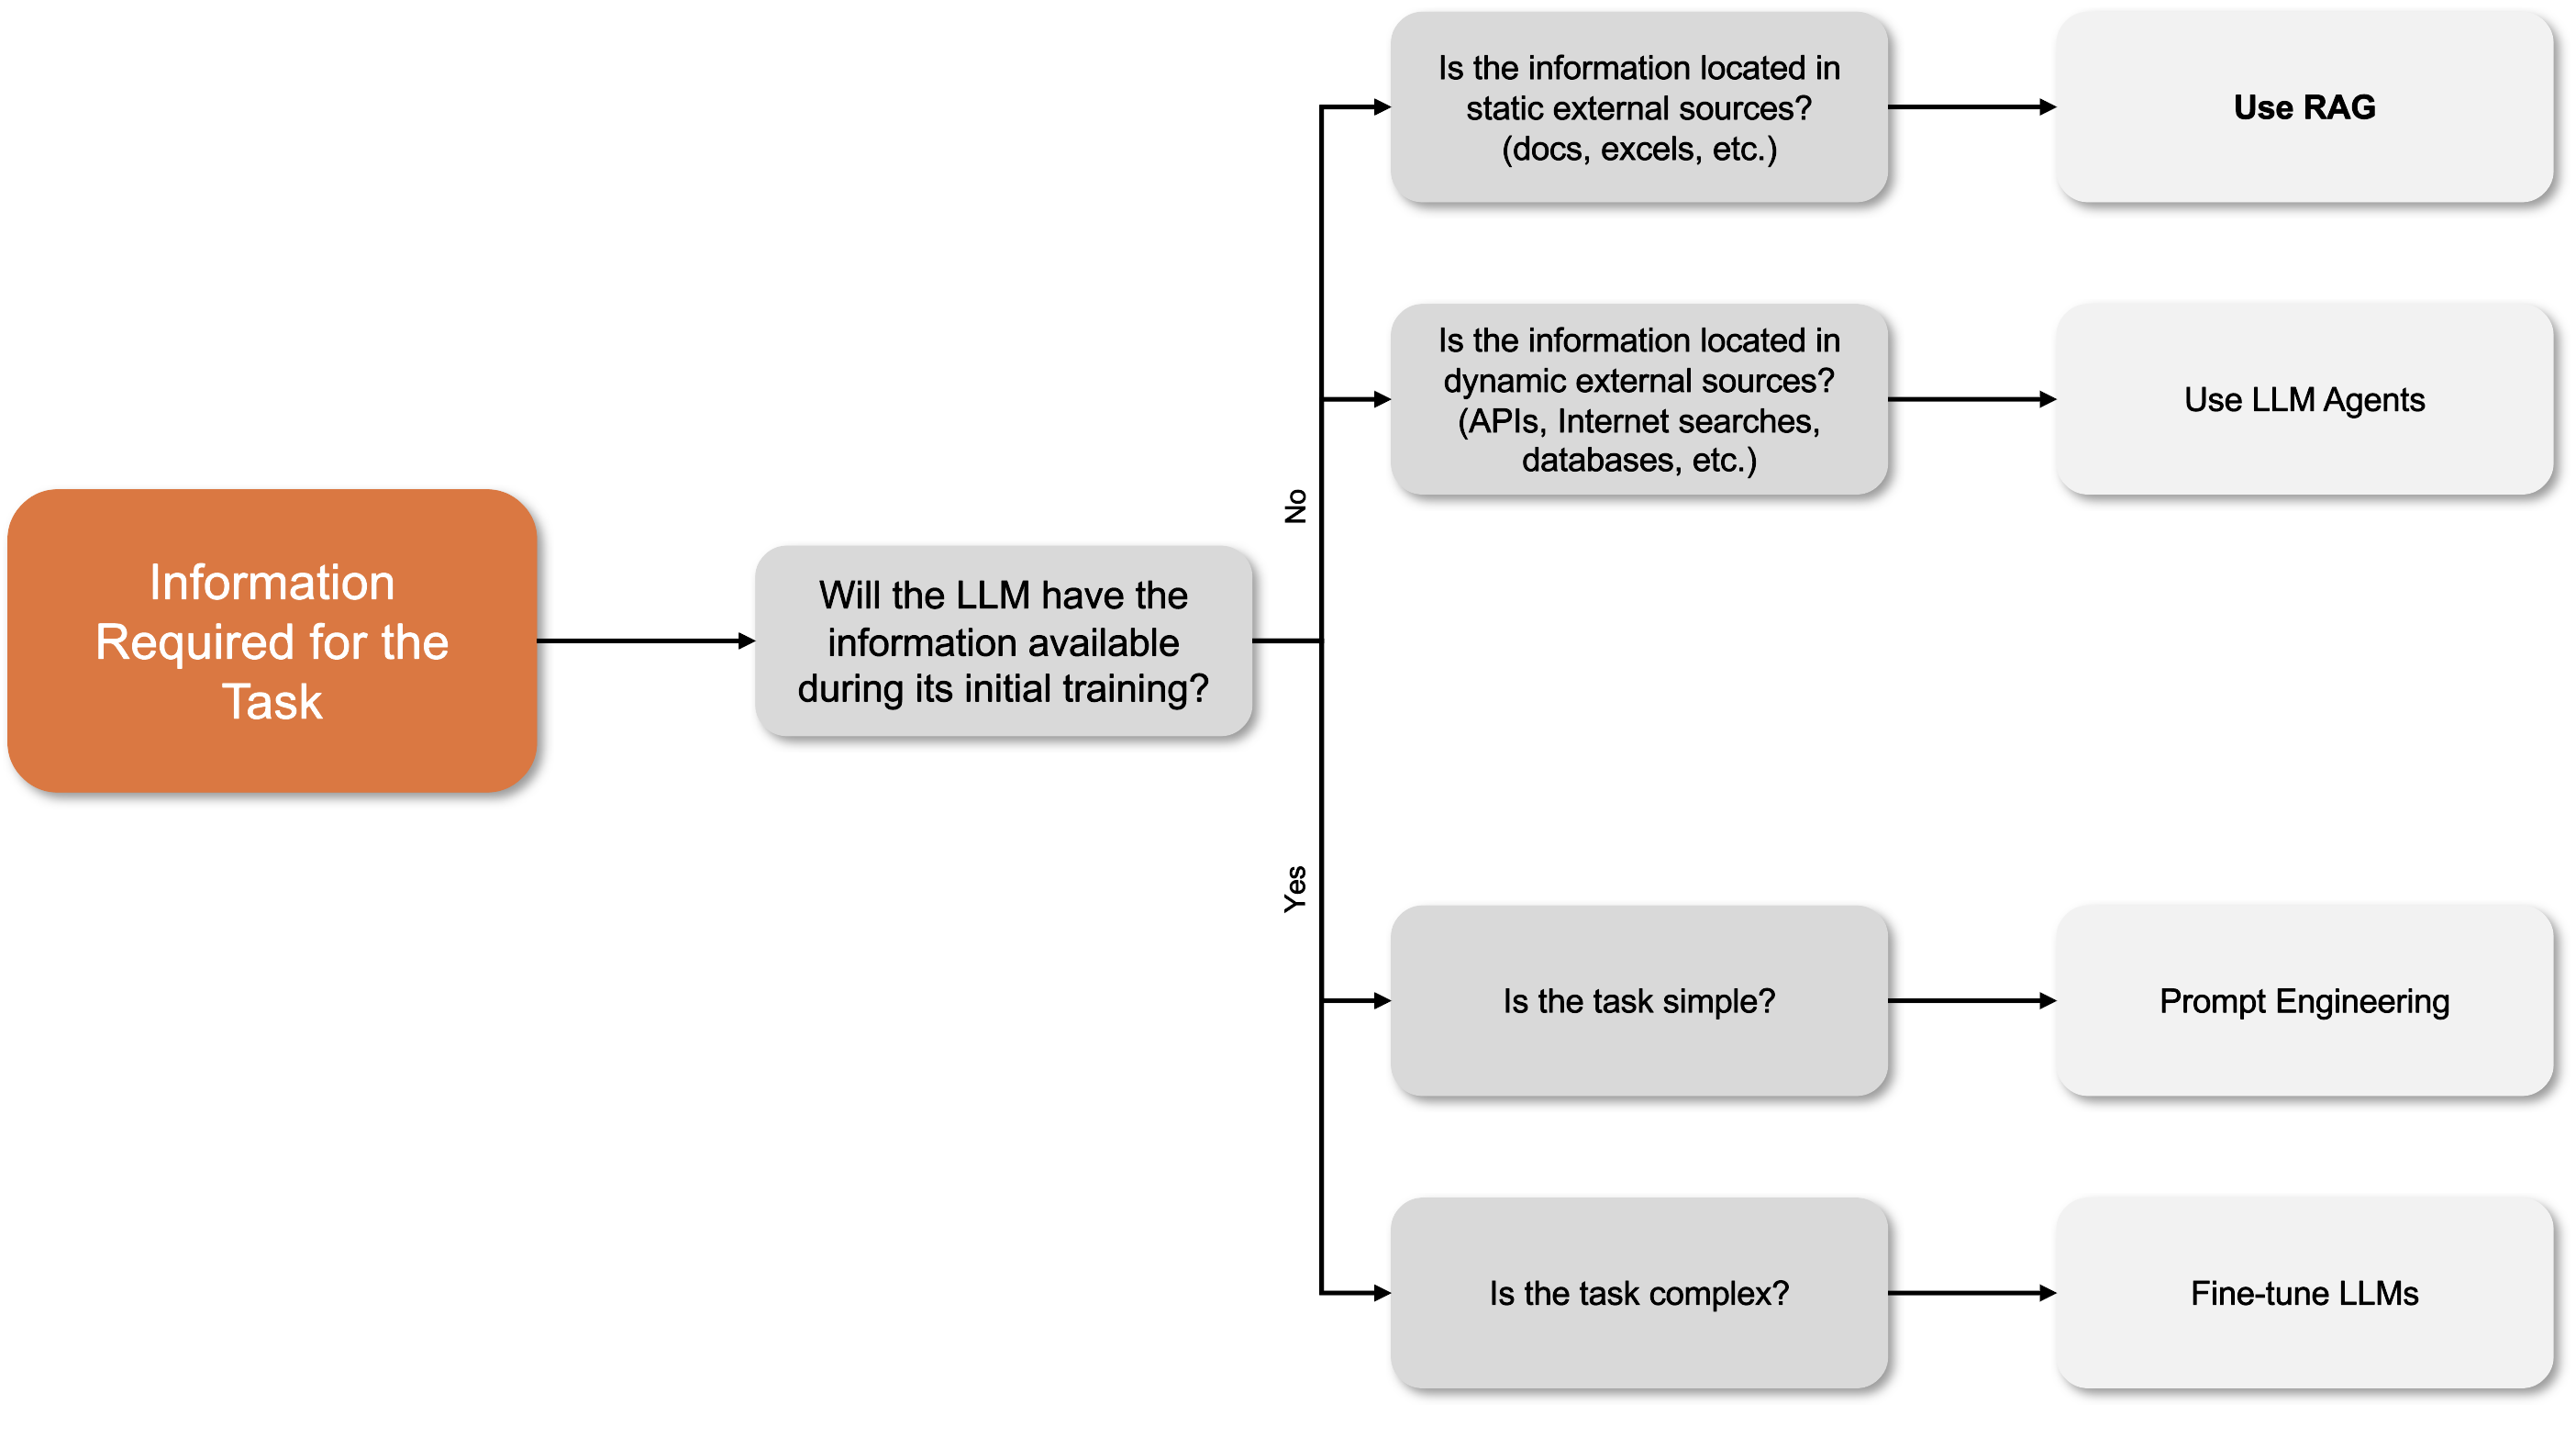

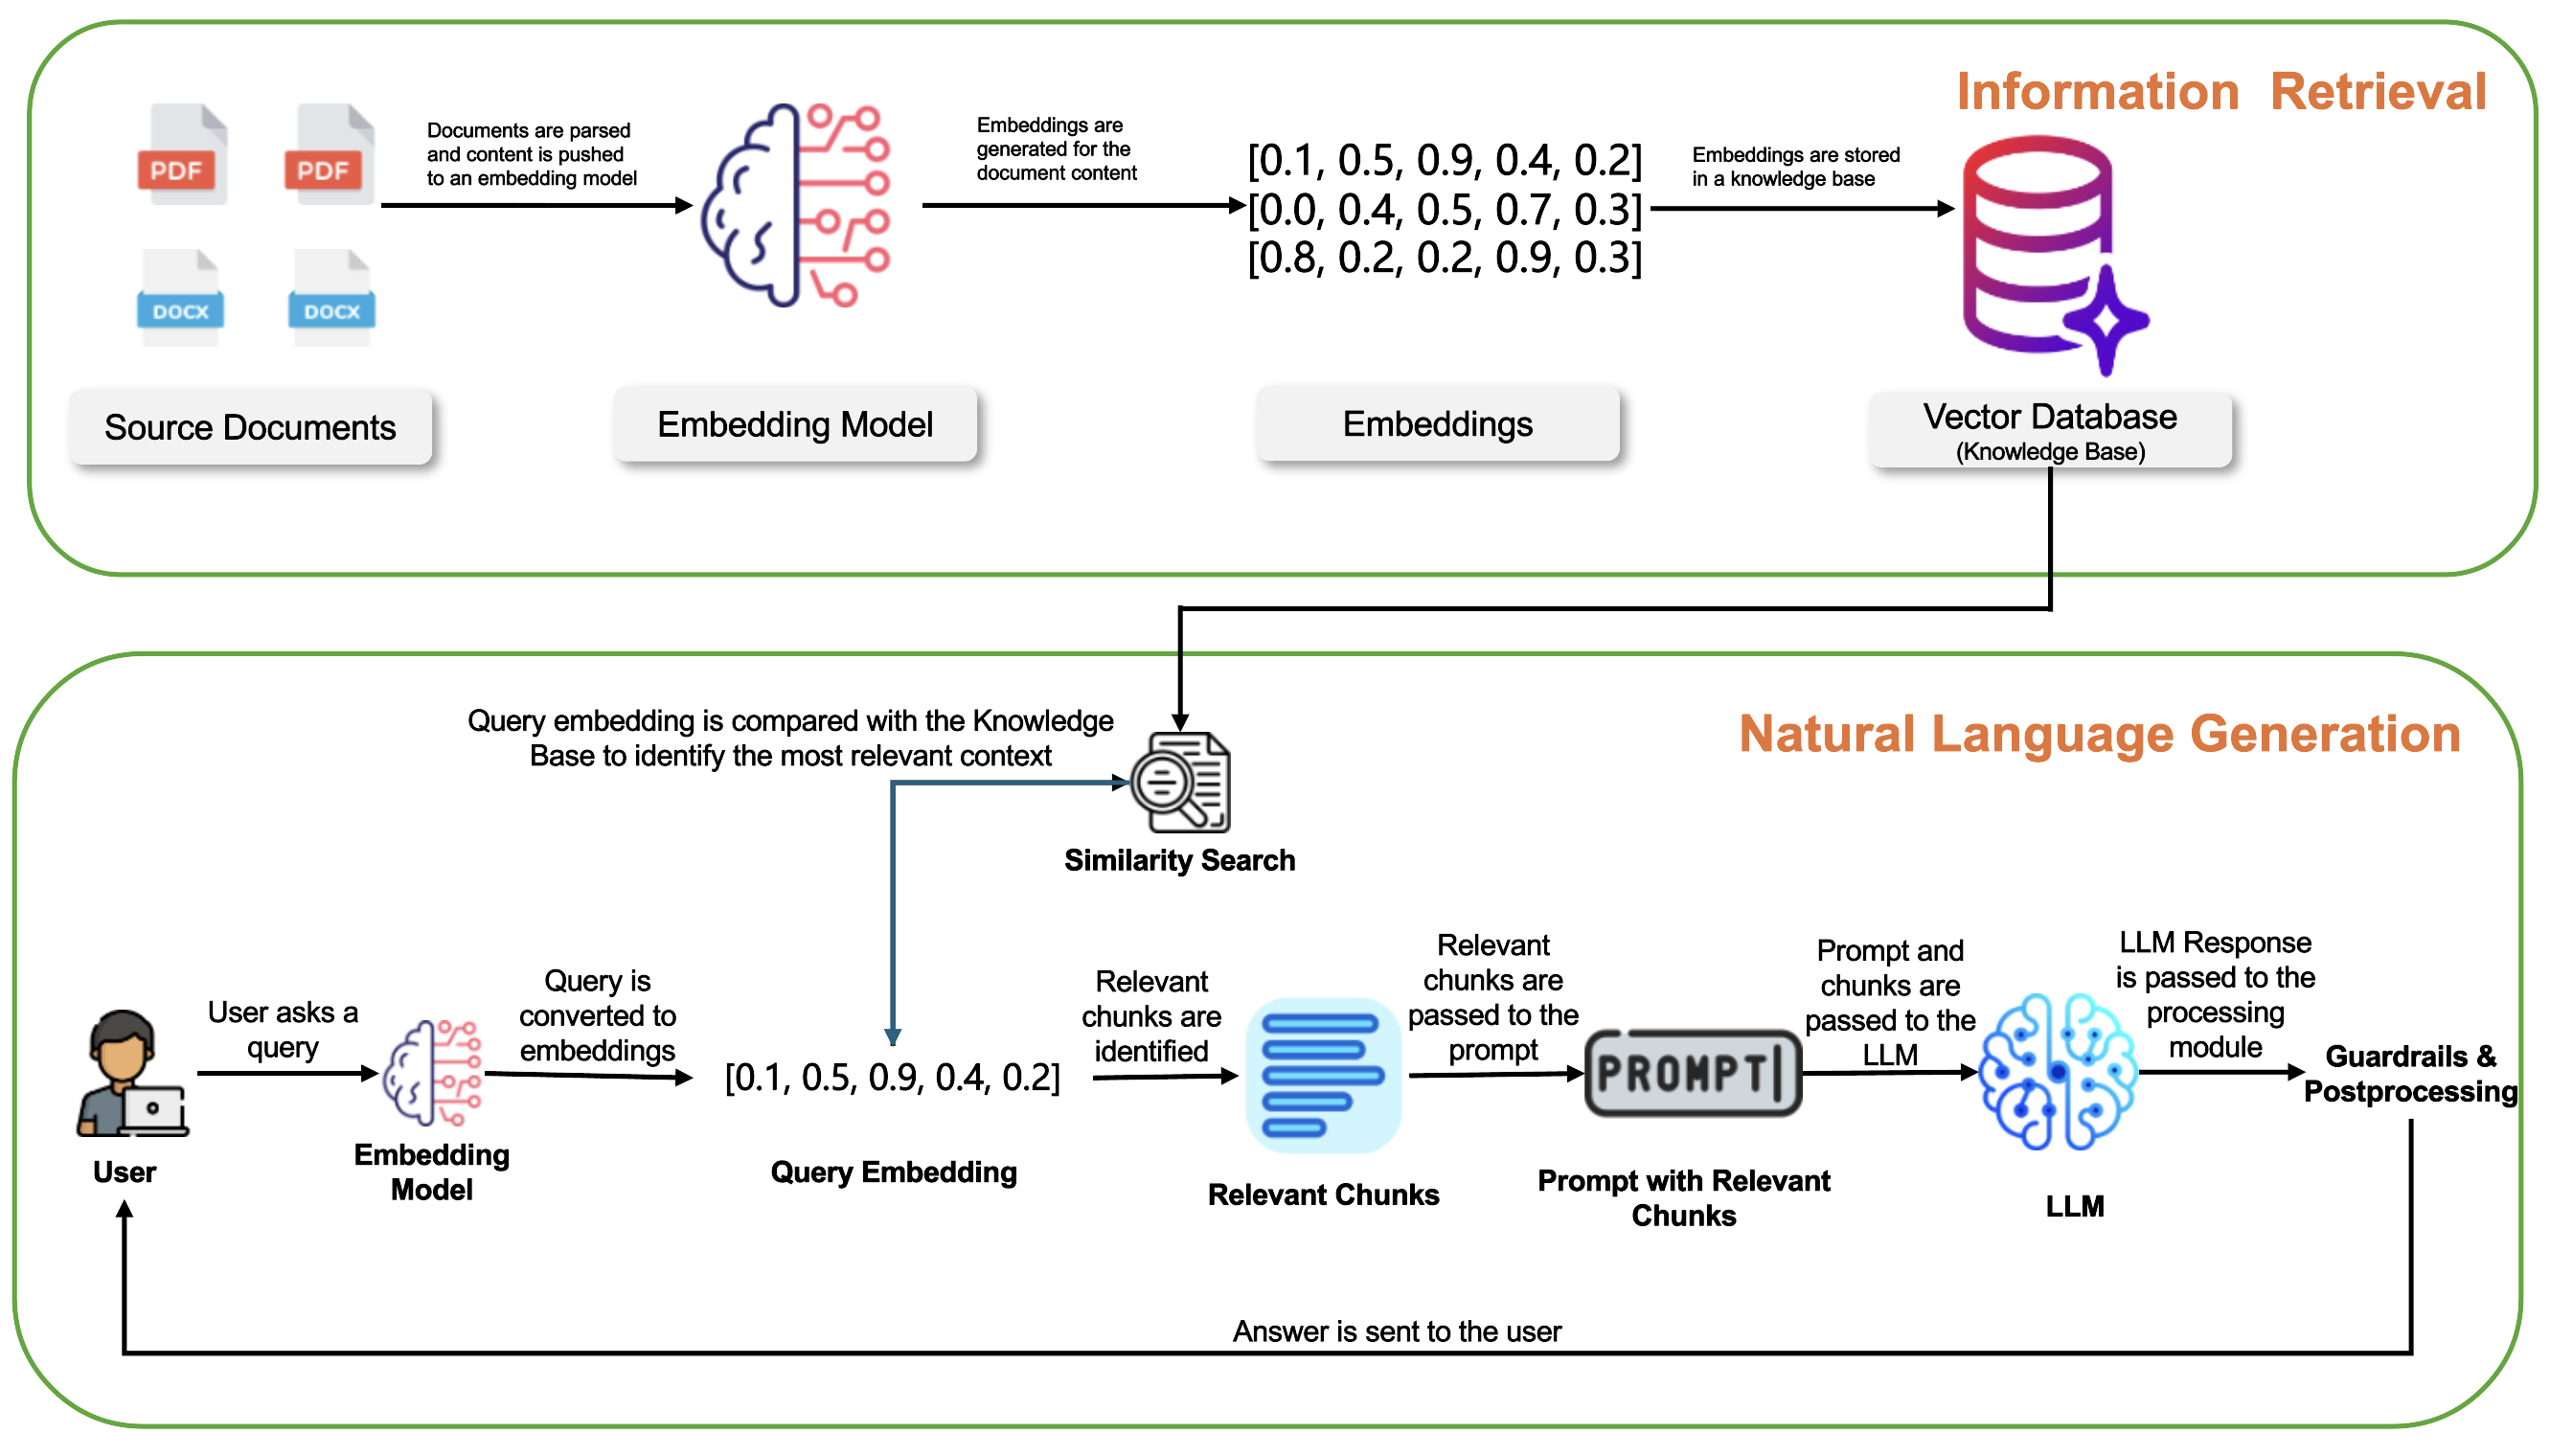

### Information Retrieval – the quest for relevance:


1. **Document Preparation**: Source documents (e.g., PDFs, DOCX files) are selected for processing.

2. **Embedding Generation**: The documents' content are converted into numerical representations (embeddings) using an advanced embedding model. These embeddings capture the meaning and context of the content.

3. **Knowledge Base Creation**: The generated embeddings are stored in a vector database, also known as a knowledge base.

4. **Query Embedding**: When a user submits a query, it is transformed into an embedding using the same embedding model.

5. **Similarity Search**: The query embedding is compared against the embeddings in the knowledge base to identify the most relevant data chunks.

6. **Information Retrieval**: The system retrieves and presents the most relevant information aligned with the user's query's intent.



To be effective in business applications, the IR system incorporates an understanding of industry-specific terminology and nuances.

### Natural Language Generation – the art of articulation:


1. **Information Integration**: Retrieved data chunks are combined with the user’s query to form a detailed prompt.

2. **Input to Language Model**: The detailed prompt is fed into a large language model (LLM).

3. **Response Generation**: The LLM generates a well-structured, contextually rich, and human-like response by synthesizing the information.

4. **Post-Processing**: The generated response undergoes refinement to enhance quality, clarity, and relevance.

5. **Guardrail Filtering**: The response is filtered through predefined guardrails to ensure adherence to standards of accuracy, insight, and user-friendliness.

6. **Response Delivery**: The polished and insightful response is presented to the user, delivering a seamless and enriching experience.

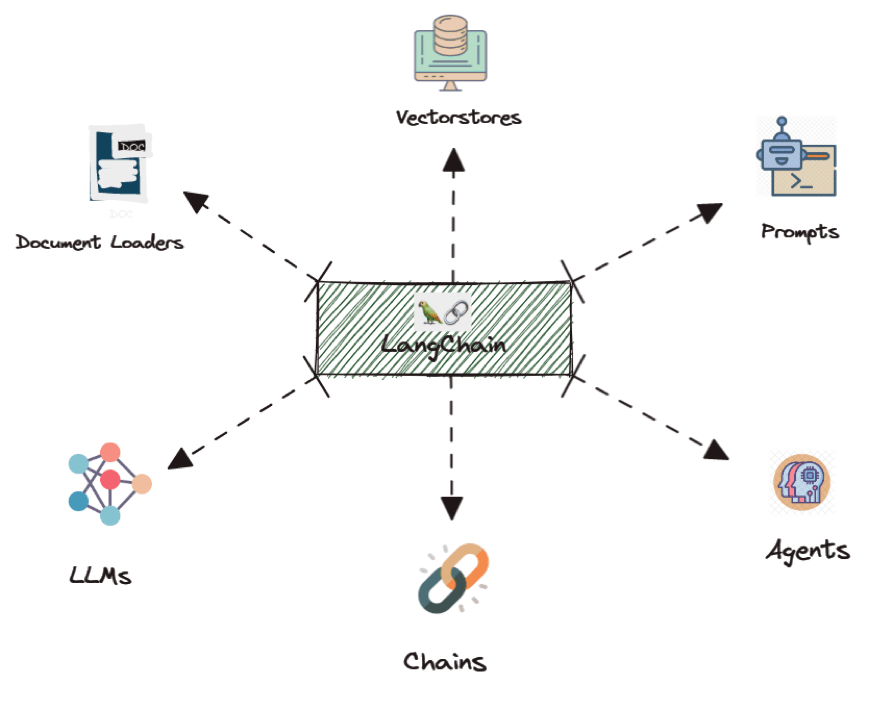

In [1]:
!pip install --upgrade langchain
!pip install --upgrade langchain-core
!pip install --upgrade langchain-community
!pip install --upgrade langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:


In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
help(ChatGoogleGenerativeAI)

Help on class ChatGoogleGenerativeAI in module langchain_google_genai.chat_models:

class ChatGoogleGenerativeAI(langchain_google_genai._common._BaseGoogleGenerativeAI, langchain_core.language_models.chat_models.BaseChatModel)
 |  ChatGoogleGenerativeAI(*, name: Optional[str] = None, cache: Union[langchain_core.caches.BaseCache, bool, NoneType] = None, verbose: bool = <factory>, callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[list[str]] = None, metadata: Optional[dict[str, Any]] = None, custom_get_token_ids: Optional[Callable[[str], list[int]]] = None, callback_manager: Optional[langchain_core.callbacks.base.BaseCallbackManager] = None, rate_limiter: Optional[langchain_core.rate_limiters.BaseRateLimiter] = None, disable_streaming: Union[bool, Literal['tool_calling']] = False, model: str, api_key: Optional[pydantic.types.SecretStr] = <factory>, credentials: Any = None, temperatu

In [3]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

chat_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

In [4]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage

# 1. Initialize the Chat Model (from the previous step)
chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Prepare the messages
# The SystemMessage sets the behavior and context for the AI.
# The HumanMessage is the user's actual query.
messages = [
    SystemMessage(content="You're an assistant knowledgeable about healthcare. Only answer healthcare-related questions."),
    HumanMessage(content="What is Ayushman Bharat?"),
]

# 3. Invoke the model with the messages
result = chat_model.invoke(messages) # notice the similarity with model.predict from sklearn

print(result.content)

Ayushman Bharat is a flagship national health protection scheme launched by the Government of India in 2018. Its primary goal is to achieve Universal Health Coverage (UHC) and ensure that no one is left behind due to financial constraints when seeking healthcare.

The scheme has two main components:

1.  **Pradhan Mantri Jan Arogya Yojana (PMJAY):** This is the health insurance component, often referred to as the world's largest government-funded health insurance scheme.
    *   **Objective:** To provide financial protection to over 50 crore (500 million) poor and vulnerable families for secondary and tertiary care hospitalization.
    *   **Coverage:** It offers a health cover of up to ₹5 lakh (approximately $6,000 USD) per family per year for cashless and paperless treatment at empanelled public and private hospitals across India.
    *   **Benefits:** Covers pre-hospitalization expenses, hospitalization expenses, and post-hospitalization expenses for a wide range of medical and surg

In [7]:
chat_model.invoke("What is blood pressure?")

AIMessage(content='Blood pressure is the **force of your blood pushing against the walls of your arteries** as your heart pumps it throughout your body.\n\nThink of your heart as a pump and your arteries as a network of hoses. When the pump pushes blood, it creates pressure inside the hoses. This pressure is essential to deliver oxygen and nutrients to all your organs and tissues.\n\n**How it\'s Measured (The Two Numbers):**\n\nBlood pressure is expressed as two numbers, typically written as a fraction (e.g., 120/80 mmHg):\n\n1.  **Systolic Pressure (the top number):** This is the higher number and represents the pressure in your arteries when your heart **beats** (contracts) and pushes blood out.\n2.  **Diastolic Pressure (the bottom number):** This is the lower number and represents the pressure in your arteries when your heart is **at rest** (between beats) and filling with blood.\n\nThe unit "mmHg" stands for millimeters of mercury, which is the standard unit for measuring pressure

In [8]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage

# 1. Initialize the Chat Model
# Use a valid model version for your region, such as 'gemini-1.5-flash-latest'
chat_model = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Prepare messages with an out-of-scope question
messages = [
    SystemMessage(content="You're an assistant knowledgeable about healthcare. Only answer healthcare-related questions."),
    HumanMessage(content="How do I change a tire?"),
]

# 3. Invoke the model
result = chat_model.invoke(messages)

print(result.content)

* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
Please retry in 41.190259953s. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
violations {
  quota_metr

ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
Please retry in 38.943918719s. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_input_token_count"
  quota_id: "GenerateContentInputTokensPerModelPerMinute-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 38
}
]

In [11]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# 1. Initialize the Chat Model
chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash"
,temperature=0,
google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Create the Prompt Template
instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions. Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}

Question: {question}
"""

review_template = ChatPromptTemplate.from_template(instruction_str)

# 3. Define the context and question
context = "The discharge process was seamless!"
question = "Did anyone have a positive experience?"

# 4. Create the chain by piping the components together
#    We also add an output parser to get a clean string result.
chain = review_template | chat_model | StrOutputParser()

# 5. Invoke the chain with the input variables
result = chain.invoke({
    "context": context,
    "question": question
})

print(result)

Yes, someone had a positive experience. They stated that "The discharge process was seamless!"


In [12]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import (
    PromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
    ChatPromptTemplate
)
from langchain_core.output_parsers import StrOutputParser

# 1. Initialize the Chat Model
chat_model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                                  temperature=0,
                                  google_api_key=userdata.get('GOOGLE_API_KEY'))

# 2. Create the detailed prompt templates
instruction_str = """Your job is to use patient reviews to answer questions about their experience at a hospital.
Use the following context to answer questions.
Be as detailed as possible, but don't make up any information that's not from the context.
If you don't know an answer, say you don't know.

Context: {context}
"""

review_system_prompt = SystemMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["context"], template=instruction_str
    )
)

review_human_prompt = HumanMessagePromptTemplate(
    prompt=PromptTemplate(
        input_variables=["question"], template="{question}"
    )
)

messages = [review_system_prompt, review_human_prompt]

# This is our final, reusable prompt template
review_prompt_template = ChatPromptTemplate(
    input_variables=["context", "question"],
    messages=messages,
)

# 3. Define the context and question
context = "I had a great stay!"
question = "Did anyone have a positive experience?"

# 4. Create the chain
chain = review_prompt_template | chat_model | StrOutputParser()

# 5. Invoke the chain
result = chain.invoke({
    "context": context,
    "question": question
})

print(result)

Yes, one patient stated, "I had a great stay!"


In [13]:
context = "I had a negative stay!"
question = "Did anyone have a positive experience?"

chain.invoke({"context": context, "question": question})

'Based on the provided context, it only states, "I had a negative stay!" There is no information about anyone having a positive experience.'

In [14]:
!pip install -U langchain-chroma # FAISS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.1 MB/s eta 0:0

In [15]:
import time
from google.colab import userdata

# Import the CSVLoader class to load documents from a CSV file.
from langchain.document_loaders.csv_loader import CSVLoader

# Import the Chroma class, which is used to create and interact with a Chroma vector database.
from langchain_chroma import Chroma

# Import the GoogleGenerativeAIEmbeddings class to create numerical vector representations (embeddings) of text using Google's models.
from langchain_google_genai import GoogleGenerativeAIEmbeddings


REVIEWS_CSV_PATH = "/content/reviews.csv"

# Define a constant variable for the directory where the Chroma vector database will be stored.
REVIEWS_CHROMA_PATH = "chroma_data"


# Create an instance of the CSVLoader.
loader = CSVLoader(
    file_path=REVIEWS_CSV_PATH,  # Specify the path to the CSV file to be loaded.
    source_column="review"       # Specify the name of the column that contains the main text content.
)

# Call the .load() method on the loader instance.
# This reads the specified column from the CSV file and loads the content into a list of Document objects.
reviews = loader.load()

# Specify the embedding function to use. We define it once to be reused.
embedding_function = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",  # Choose the specific embedding model provided by Google.
    google_api_key=userdata.get('GOOGLE_API_KEY')  # Securely fetch the Google API key.
)

# Set the size of each batch to process.
batch_size = 10
# Calculate the total number of batches.
num_batches = (len(reviews) - 1) // batch_size + 1
reviews_vector_db = None

# Loop through the documents in batches to avoid hitting the API's rate limit.
for i in range(0, len(reviews), batch_size):
    # Get the current batch of documents.
    batch_docs = reviews[i:i + batch_size]
    current_batch_num = i // batch_size + 1

    print(f"Processing batch {current_batch_num}/{num_batches}...")

    if i == 0:
        # For the first batch, create a new Chroma vector database.
        # The `from_documents` method handles the entire process of embedding and storing the data.
        reviews_vector_db = Chroma.from_documents(
            documents=batch_docs,  # Pass the list of Document objects that need to be embedded.
            embedding=embedding_function,
            # Specify the directory on the disk where the vector database will be saved.
            # This makes the database persistent, so we can load it directly in the future.
            persist_directory=REVIEWS_CHROMA_PATH
        )
    else:
        # For subsequent batches, add the documents to the existing database.
        reviews_vector_db.add_documents(documents=batch_docs)

    # Pause the script for 30 seconds after each batch to respect the per-minute rate limit.
    print(f"Batch {current_batch_num} processed. Waiting for 30 seconds...")
    time.sleep(30)

print("Vector database created successfully and saved to the specified directory.")

Processing batch 1/101...
Batch 1 processed. Waiting for 30 seconds...
Processing batch 2/101...
Batch 2 processed. Waiting for 30 seconds...
Processing batch 3/101...
Batch 3 processed. Waiting for 30 seconds...
Processing batch 4/101...
Batch 4 processed. Waiting for 30 seconds...
Processing batch 5/101...
Batch 5 processed. Waiting for 30 seconds...
Processing batch 6/101...
Batch 6 processed. Waiting for 30 seconds...
Processing batch 7/101...
Batch 7 processed. Waiting for 30 seconds...
Processing batch 8/101...
Batch 8 processed. Waiting for 30 seconds...
Processing batch 9/101...
Batch 9 processed. Waiting for 30 seconds...
Processing batch 10/101...
Batch 10 processed. Waiting for 30 seconds...
Processing batch 11/101...
Batch 11 processed. Waiting for 30 seconds...
Processing batch 12/101...
Batch 12 processed. Waiting for 30 seconds...
Processing batch 13/101...
Batch 13 processed. Waiting for 30 seconds...
Processing batch 14/101...
Batch 14 processed. Waiting for 30 seconds

KeyboardInterrupt: 

In [16]:
question = """Has anyone complained about communication with the hospital staff?"""
relevant_chunks = reviews_vector_db.similarity_search(question, k=3)

relevant_chunks[0].page_content

'review_id: 1001\nvisit_id: 3240\nreview: I was disappointed with the lack of communication between different departments in the hospital. It led to confusion about my treatment plan and discharge instructions.\nphysician_name: Ronald Hernandez Jr.\nhospital_name: Wallace-Hamilton\npatient_name: Jacob Smith'

In [18]:
# Create a retriever to fetch the top 10 most relevant reviews based on a query
from langchain_core.runnables import RunnablePassthrough

reviews_retriever = reviews_vector_db.as_retriever(k=10)
# The `as_retriever` method converts the database into a retriever.
# `k=10` specifies that the retriever should return the top 10 most relevant documents for a query.

# Create a chain for querying and generating responses
review_chain = (
    {"context": reviews_retriever, "question": RunnablePassthrough()}
    # Step 1: Retrieves relevant reviews (`context`) and passes the `question` unchanged
    | review_prompt_template
    # Step 2: Formats the retrieved reviews and the user's question into a structured prompt
    | chat_model
    # Step 3: Sends the prompt to the OpenAI chat model to generate a response
    | StrOutputParser()
    # Step 4: Parses the model's raw output into a clean string format for easier use
)

In [19]:
question = """Has anyone complained about communication with the hospital staff?"""
review_chain.invoke(question)

'Yes, several patients have complained about communication with the hospital staff:\n\n*   **Jacob Smith** (review_id: 1001) was disappointed with the lack of communication between different departments in the hospital, which led to confusion about his treatment plan and discharge instructions.\n*   **Daniel Harris** (review_id: 954) experienced poor communication among the staff, which led to confusion about his treatment plan.\n*   **Loretta Schmitt** (review_id: 1) noted that communication between the staff and patients was lacking, and felt the nurses seemed overwhelmed.\n*   **Mason Phelps** (review_id: 239) was disappointed with the lack of communication from the medical team, feeling constantly in the dark about his treatment plan and prognosis.'

In [20]:
!pip install gradio

In [21]:
def respond_to_user_question(question: str, history: list) -> str:
    """
    Respond to a user's question using the review_chain.
    """
    return review_chain.invoke(question)

In [22]:
respond_to_user_question("Has anyone complained about communication with the hospital staff?", [])

'Yes, several patients have complained about communication with the hospital staff:\n\n*   **Jacob Smith (review_id: 1001)** was disappointed with the lack of communication between different departments, which led to confusion about his treatment plan and discharge instructions at Wallace-Hamilton hospital.\n*   **Daniel Harris (review_id: 954)** stated that the communication among the staff was poor, leading to confusion about his treatment plan at Bell, Mcknight and Willis hospital.\n*   **Loretta Schmitt (review_id: 1)** noted that communication between the staff and patients was lacking at Bell, Mcknight and Willis hospital, and felt the nurses seemed overwhelmed.\n*   **Mason Phelps (review_id: 239)** was disappointed with the lack of communication from the medical team, feeling constantly in the dark about his treatment plan and prognosis at Jones, Brown and Murray hospital.'

In [ ]:
import gradio as gr
# Create the Gradio ChatInterface
interface = gr.ChatInterface(fn=respond_to_user_question, title="Review Helper Bot")

# Launch the Gradio app
interface.launch(debug=True)

**TESTING**

In [23]:
respond_to_user_question("Has anyone complained about communication with the hospital staff?", [])

'Yes, several patients have complained about communication with the hospital staff:\n\n*   **Jacob Smith** (review_id: 1001) was disappointed with the lack of communication between different departments, which led to confusion about his treatment plan and discharge instructions.\n*   **Daniel Harris** (review_id: 954) stated that the communication among the staff was poor, leading to confusion about his treatment plan.\n*   **Loretta Schmitt** (review_id: 1) found that communication between the staff and patients was lacking, and felt the nurses seemed overwhelmed.\n*   **Mason Phelps** (review_id: 239) was disappointed with the lack of communication from the medical team, feeling constantly in the dark about his treatment plan and prognosis.'

In [24]:
respond_to_user_question("is there and cleanliness and privacy issue in hospital?", [])

'Regarding cleanliness, two patients had positive experiences:\n*   One patient found the hospital\'s cleanliness and organization "impressive" (review_id: 633).\n*   Another patient stated that the hospital\'s cleanliness and hygiene standards were "impeccable" (review_id: 660).\n\nRegarding privacy, there are mixed experiences:\n*   One patient found the hospital\'s commitment to patient privacy "reassuring" (review_id: 1004).\n*   However, another patient was "disappointed with the lack of privacy in the shared hospital rooms," citing constant noise and lack of personal space as challenging for rest and recovery (review_id: 700).'

In [25]:
respond_to_user_question("How was the communication between different department in hospital", [])

'Based on the patient reviews, there was a **lack of communication between different departments** in the hospital. This led to:\n\n*   Confusion about treatment plans.\n*   Confusion about discharge instructions.\n*   Delays and confusion regarding treatment due to a lack of staff coordination.\n*   A general lack of communication regarding the daily schedule and procedures.'

In [26]:
respond_to_user_question("How many review contains issue related to cleanliness out of total reviews", [])

'Out of a total of 4 reviews, none of them contain an issue related to cleanliness. All reviews that mention cleanliness describe it positively:\n\n*   "The hospital\'s cleanliness and hygiene standards were impeccable." (review_id: 660)\n*   "The cleanliness standards were impressive." (review_id: 884)\n*   "The hospital was clean." (review_id: 847)\n*   "The hospital\'s cleanliness and organization were impressive." (review_id: 633)'

In [27]:
respond_to_user_question("is there any mention in lack of hospitability towards patients?", [])

"Yes, there are several mentions that indicate a lack of hospitability towards patients:\n\n*   **Lack of communication:**\n    *   In review_id 1, communication between the staff and patients was lacking, and nurses seemed overwhelmed.\n    *   In review_id 93, there was a lack of communication between the medical team and the patient, leaving the patient feeling uninformed and frustrated.\n*   **Lack of bedside manner:**\n    *   In review_id 660, a few nurses exhibited a lack of bedside manner, which was disheartening to the patient.\n*   **Unwelcoming environment:**\n    *   In review_id 93, the facilities were outdated, contributing to a disappointing experience.\n    *   In review_id 50, the hospital's facilities were outdated and in need of renovation, and the environment did not feel conducive to healing. The patient stated that modernization is essential to provide a comfortable and welcoming space for patients."

In [31]:
respond_to_user_question("is there any cases of medical negligience?", [])

"I don't know. The provided reviews mention issues such as lack of coordination among departments, unnecessary delays in treatment, overwhelmed nurses, and lack of communication, leading to confusion about treatment plans and discharge instructions. However, none of the reviews explicitly state or imply medical negligence."

In [29]:
respond_to_user_question("How can we increase the review and ratings?", [])

"I don't know how to increase the review and ratings based on the provided context. The reviews highlight areas where improvement is needed, such as:\n\n*   **Patient Care and Staff Communication:** Nurses seemed overwhelmed, and communication between staff and patients was lacking (review_id: 1).\n*   **Inter-departmental Communication:** Lack of communication between different departments led to confusion about treatment plans and discharge instructions (review_id: 1001).\n*   **Waiting Area Amenities:** Outdated magazines in the waiting area could use an upgrade (review_id: 983).\n*   **Billing Process:** Hiccups in the billing process caused stress, and improved transparency and communication regarding financial matters are essential (review_id: 12).\n\nAddressing these issues could potentially lead to better patient experiences and, consequently, higher ratings, but the context does not provide specific strategies for *increasing the number* of reviews or *proactively boosting* ra